<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/Example_1_19_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1.19 – Método de Heun (Predictor–Corrector)

Este notebook resuelve la respuesta de un sistema masa–resorte–amortiguador
forzado mediante el **método de Heun**, usando dos tamaños de paso distintos
y comparando los resultados.

Ecuación del sistema:

\[
x'' + 2\zeta\omega_n x' + \omega_n^2 x = \frac{F_0}{m}\sin(\omega t)
\]

Se utiliza un enfoque de **estado**:
\[
\begin{cases}
x' = v \\
v' = \frac{F_0}{m}\sin(\omega t) - 2\zeta\omega_n v - \omega_n^2 x
\end{cases}
\]


In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# Parámetros físicos
m = 1
z = 0.03
wn = 1
Fo = 1
w = 0.4 * wn

# Condiciones iniciales
x0 = 0
Dx0 = 0
y0 = np.array([x0, Dx0])

# Intervalo de tiempo
t0 = 0
tf = 110
tspan = (t0, tf)


In [8]:
def rates(t, y):
    x, Dx = y
    D2x = (Fo/m)*np.sin(w*t) - 2*z*wn*Dx - wn**2*x
    return np.array([Dx, D2x])


In [9]:
def heun(ode_function, tspan, y0, h, tol=1e-6, itermax=100):
    t0, tf = tspan
    t = t0
    y = y0.copy()

    tout = [t]
    yout = [y.copy()]

    while t < tf:
        h = min(h, tf - t)

        # Predictor (Euler)
        f1 = ode_function(t, y)
        y_pred = y + h * f1
        t_next = t + h

        # Corrector iterativo
        err = tol + 1
        iter = 0
        y_corr = y_pred.copy()

        while err > tol and iter < itermax:
            f2 = ode_function(t_next, y_corr)
            y_new = y + h * (f1 + f2) / 2
            err = np.max(np.abs((y_new - y_corr) / (y_new + np.finfo(float).eps)))
            y_corr = y_new
            iter += 1

        if iter >= itermax:
            raise RuntimeError("No converge el corrector de Heun")

        t = t_next
        y = y_corr

        tout.append(t)
        yout.append(y.copy())

    return np.array(tout), np.array(yout)


In [10]:
# Paso grande
h1 = 1.0
t1, f1 = heun(rates, tspan, y0, h1)

# Paso pequeño
h2 = 0.1
t2, f2 = heun(rates, tspan, y0, h2)


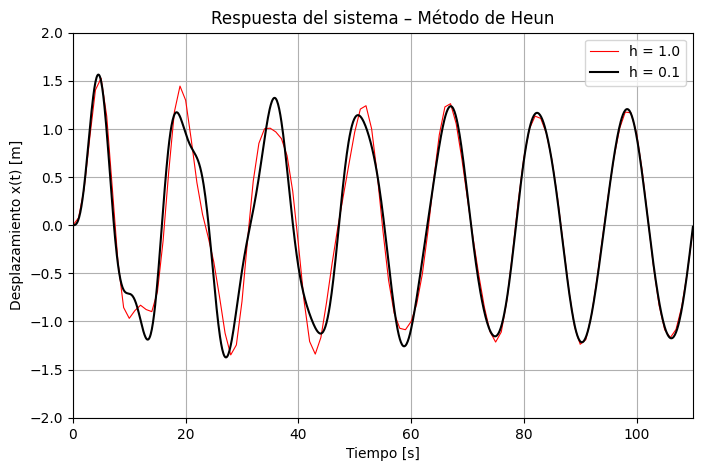

In [11]:
plt.figure(figsize=(8,5))

plt.plot(t1, f1[:,0], 'r', linewidth=0.8, label='h = 1.0')
plt.plot(t2, f2[:,0], 'k', linewidth=1.5, label='h = 0.1')

plt.xlabel('Tiempo [s]')
plt.ylabel('Desplazamiento x(t) [m]')
plt.title('Respuesta del sistema – Método de Heun')
plt.grid(True)
plt.legend()
plt.xlim(0,110)
plt.ylim(-2,2)

plt.show()


## Conclusiones

- El método de Heun mejora significativamente la precisión del método de Euler.
- Un paso de tiempo menor produce una solución más suave y estable.
- El esquema predictor–corrector garantiza convergencia dentro de la tolerancia establecida.
- Para sistemas no rígidos como este, Heun ofrece un buen compromiso entre
  precisión y costo computacional.
